In [4]:
#Using BeautifulSoup4 library which used to scrp information from web pages.
!pip install bs4

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 143.0/143.0 kB 2.8 MB/s eta 0:00:00
Using legacy 'setup.py install' for bs4, since package 'wheel' is not installed.
  Running setup.py install for bs4: started
  Running setup.py install for bs4: finished with status 'done'



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#to send request from local PC to Amazon Website
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#using pandas to convert that data into DataFrame and then store into csv file
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [19]:
#required webpage URL (Amazon Book Bestseller URL)
URL = "https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_nav_books_0"

user agent = The User-Agent (UA) string is contained in the HTTP headers and is intended to identify devices requesting online content.

To get the user agent -> Go to whatismybrowser.com -> click on Detect my settings -> What is my user agent? option.

In [20]:
#Headers for request
HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36','Accept-Language':'en-US, en;q=0.5'})

In [21]:
#making HTTP request
webpage = requests.get(URL,headers=HEADERS)

In [22]:
#Response 200 means HTTP request successful
#Response 503 means failed, try different url or after sometime.
webpage

<Response [200]>

In [23]:
#getting entire html content
webpage.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimization -->\n<!-- 

In [24]:
type(webpage.content)

bytes

So to convert byte into html file format, we will use beautifulsoup4

In [25]:
soup = BeautifulSoup(webpage.content,"html.parser")
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--

In [26]:
type(soup)

bs4.BeautifulSoup

In [29]:
links = soup.find_all("a", attrs={"class":"a-link-normal"})
links

[<a class="a-link-normal" href="/Rashtra-Eighth-Class-Citizens-State-Sanctioned-Apartheid/dp/9392209479/ref=zg_bs_g_books_sccl_1/259-0268472-8495240?psc=1" role="link" tabindex="-1"><div class="a-section a-spacing-mini _cDEzb_noop_3Xbw5"><img alt="Hindus in Hindu Rashtra (Eighth-Class Citizens and Victims of State-Sanctioned Apartheid)" class="a-dynamic-image p13n-sc-dynamic-image p13n-product-image" data-a-dynamic-image='{"https://images-eu.ssl-images-amazon.com/images/I/91EtFGJvG8L._AC_UL300_SR300,200_.jpg":[300,200],"https://images-eu.ssl-images-amazon.com/images/I/91EtFGJvG8L._AC_UL600_SR600,400_.jpg":[600,400],"https://images-eu.ssl-images-amazon.com/images/I/91EtFGJvG8L._AC_UL900_SR900,600_.jpg":[900,600]}' height="200px" src="https://images-eu.ssl-images-amazon.com/images/I/91EtFGJvG8L._AC_UL300_SR300,200_.jpg" style="max-width:300px;max-height:200px"/></div></a>,
 <a class="a-link-normal" href="/Rashtra-Eighth-Class-Citizens-State-Sanctioned-Apartheid/dp/9392209479/ref=zg_bs_g_

In [30]:
links[0]

<a class="a-link-normal" href="/Rashtra-Eighth-Class-Citizens-State-Sanctioned-Apartheid/dp/9392209479/ref=zg_bs_g_books_sccl_1/259-0268472-8495240?psc=1" role="link" tabindex="-1"><div class="a-section a-spacing-mini _cDEzb_noop_3Xbw5"><img alt="Hindus in Hindu Rashtra (Eighth-Class Citizens and Victims of State-Sanctioned Apartheid)" class="a-dynamic-image p13n-sc-dynamic-image p13n-product-image" data-a-dynamic-image='{"https://images-eu.ssl-images-amazon.com/images/I/91EtFGJvG8L._AC_UL300_SR300,200_.jpg":[300,200],"https://images-eu.ssl-images-amazon.com/images/I/91EtFGJvG8L._AC_UL600_SR600,400_.jpg":[600,400],"https://images-eu.ssl-images-amazon.com/images/I/91EtFGJvG8L._AC_UL900_SR900,600_.jpg":[900,600]}' height="200px" src="https://images-eu.ssl-images-amazon.com/images/I/91EtFGJvG8L._AC_UL300_SR300,200_.jpg" style="max-width:300px;max-height:200px"/></div></a>

In [32]:
links[0].get('href')

'/Rashtra-Eighth-Class-Citizens-State-Sanctioned-Apartheid/dp/9392209479/ref=zg_bs_g_books_sccl_1/259-0268472-8495240?psc=1'

In [37]:
link = links[0].get('href')
product_link = "https://www.amazon.in" + link
product_link

'https://www.amazon.in/Rashtra-Eighth-Class-Citizens-State-Sanctioned-Apartheid/dp/9392209479/ref=zg_bs_g_books_sccl_1/259-0268472-8495240?psc=1'

In [34]:
#making HTTP request
new_webpage = requests.get(product_link,headers=HEADERS)
new_webpage

<Response [200]>

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--
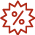

In [36]:
new_soup = BeautifulSoup(new_webpage.content,"html.parser")
new_soup

In [38]:
new_soup.find("span", attrs={'id':'productTitle'})

<span class="a-size-extra-large celwidget" id="productTitle">  Hindus in Hindu Rashtra (Eighth-Class Citizens and Victims of State-Sanctioned Apartheid) </span>

In [39]:
new_soup.find("span", attrs={'id':'productTitle'}).text

'  Hindus in Hindu Rashtra (Eighth-Class Citizens and Victims of State-Sanctioned Apartheid) '

In [40]:
new_soup.find("span", attrs={'id':'productTitle'}).text.strip()

'Hindus in Hindu Rashtra (Eighth-Class Citizens and Victims of State-Sanctioned Apartheid)'

In [42]:
new_soup.find("span", attrs={'class':'a-price-whole'}).text

'193'

In [44]:
new_soup.find("i", attrs={'class':'a-icon a-icon-star a-star-5 cm-cr-review-stars-spacing-big'}).text

'4.9 out of 5 stars'